# Fredlund's 1D Consolidation for Unsaturarted Soils

### Governing equation for water phase 

\begin{equation}
    \frac{\partial u_w}{\partial t} = -C_w \frac{\partial u_a}{\partial t} - C_{v}^{w} \frac{\partial^2 u_w}{\partial t^2} 
\end{equation}
### Governing equation for Air phase
\begin{equation}
    \frac{\partial u_a}{\partial t} = -C_a \frac{\partial u_w}{\partial t} - C_{v}^{a} \frac{\partial^2 u_a}{\partial t^2} 
\end{equation}


#### Python Library #####

In [4]:
import numpy as np
import math
import mpmath 
from mpmath import inf, exp, nsum
import matplotlib.pyplot as plt

#### Input Parameters


In [2]:
kw = 10**-10      #Coefficient of Permeability of water, m/s

ka = 0.11*kw      #Coefficient of Permeability of air, m/s

m1w = 0.5*10**-4  #Compressibility of water structure when d(U𝑎-Uw) is zero, 1/kPa

m2w = 2*10**-4    #Compressibility of water structure when d(𝜎 − Ua )  is zero, 1/kPa

m1s = 2.5*10**-4  #Compressibility of soil structure when d(U𝑎-Uw) is zero, 1/kPa

m2s = 1*10**-4    #Compressibility of soil structure when d(𝜎 − Ua )  is zero, 1/kPa

n = 0.5           #Initial porosity
s = 0.8           #Initial Saturation 
h = 10            #Height of the sample, m
q = 100           #Surcharge load, kPa 

uai = 30          #Initial pore air pressure, kpa
uwi = 50          #Initial pore water pressure, kpa

#Constants 
rw = 9.81
g = 9.81
R = 8.314
tabs = 273.15
uatm = 101.325
ma = 0.02897

T = [0.001, 0.01, 0.03, 0.05, 0.08, 0.1]
z = 5

#### Interactive constant for air phase, $C_a$

In [6]:
m1a = -((-m1s) - (-m1w))
m2a = -((-m2s) - (-m2w))
ca = m2a/(m1a-m2a-((n*(1-s))/uatm))

#### Coeffcitent of consolidation with respect to air phase, $C_{v}^{a}$

In [7]:
cva = ka*R*tabs/(g*uatm*ma*(m1a-m2a-((n*(1-s))/(uatm))))

#### Interactive constant for water phase, $C_w$

In [8]:
cw = (1-(m2w/m1w))/(m2w/m1w)

#### Coeffcitent of consolidation with respect to water phase, $C_{v}^{w}$

In [9]:
cvw = kw/(rw*m2w)

In [10]:
d = (1-(cw*ca))*kw
Aa = -(cva*rw*m1s)/d
Aw = (ca*cvw*rw*m1s)/d
Wa = (cw*cva*rw*m1s)/d
Ww = -(cvw*rw*m1s)/d


In [11]:
e1 = (Aa-Ww)**2+(4*Aw*Wa) 
e = math.sqrt(e1)
Q1 = 0.5*(Aa+Ww+e)
Q2 = 0.5*(Aa+Ww-e)
c12 = (Wa)/(Q2-Aa)
c21 = Aw/(Q1-Ww)

#### Transformed initial conditions

In [12]:

phii1 = (uai + (c21*uwi))
phii2 = ((c12*uai) + uwi)


## Analytical Solution

\begin{equation}
    \phi = \sum_{m=1}^{\inf} \left(2 \int_{0}^{1} \phi^i\left(\overline{z}\right) sin\left(K \overline{z}\right) d\overline{z}\right) sin\left(K \overline{z}\right) e^{\left(-K^2TQ\right)}
\end{equation}
where,
\begin{equation}
K = \left(2m + 1\right)\pi/2
\end{equation}

In [13]:
def phi_compute(phii, T, Q, Z):
    m = 0
    k = ((2*m)+1)*(math.pi/2)
    phi = []
    for z in Z:
        p = 0
        for m in range(1, 2):
            p = p + ((2*phii/k)*math.sin(k*z)*np.exp(-1*k**2*T*Q))
        phi.append(float(p))
    return phi

In [14]:
Z = np.arange(0.1, 1, 0.1)
Phi_1 = []
Phi_2 = []
for i in range(6):
    phi1 = phi_compute(phii1, T[i], Q1, Z)

    phi2 = phi_compute(phii2, T[i], Q2, Z)

    Phi_1.append(phi1)
    Phi_2.append(phi2)

Phi_1 = np.asarray(Phi_1, dtype = 'float')
Phi_2 = np.asarray(Phi_2, dtype = 'float')



In [28]:
ua = ((c21*Phi_2)-Phi_1)/((c12*c21)-1)
uw = ((c12*Phi_1)-Phi_2)/((c12*c21)-1)
x = ua/q
j = uw/q

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 9 Text major ticklabel objects>)

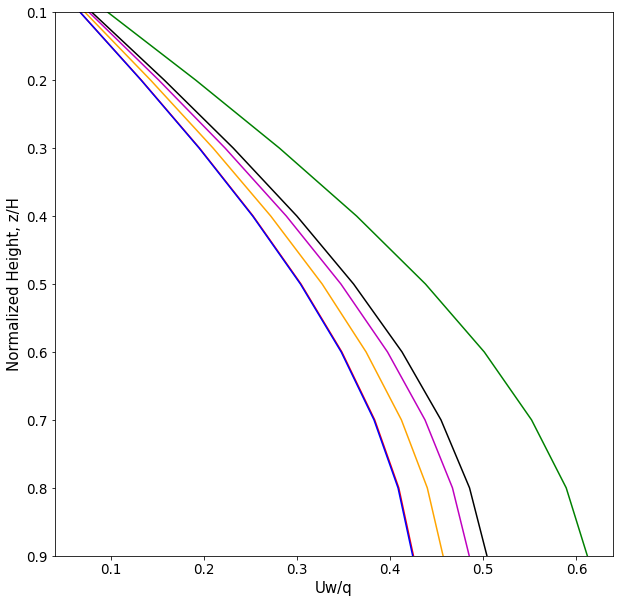

In [34]:
x_t = x.transpose()
j_t = j.transpose()


j1 = j_t[:,0]
j2 = j_t[:,1]
j3 = j_t[:,2]
j4 = j_t[:,3]
j5 = j_t[:,4]
j6 = j_t[:,5]

plt.figure(figsize=(10,10))
plt.plot(j1, Z, color = "g")
plt.plot(j2, Z, color= "k")
plt.plot(j3, Z, color= "red")
plt.plot(j4, Z, color = "b")
plt.plot(j5, Z, color= "orange")
plt.plot(j6, Z, color= "m")

plt.ylim(0.9,0.1)
plt.xlabel('Uw/q', fontsize=15)
plt.ylabel('Normalized Height, z/H', fontsize=15)
plt.xticks(fontsize=13.5)
plt.yticks(fontsize=13.5)
#f.savefig('uw/q.png', bbox_inches='tight')

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 9 Text major ticklabel objects>)

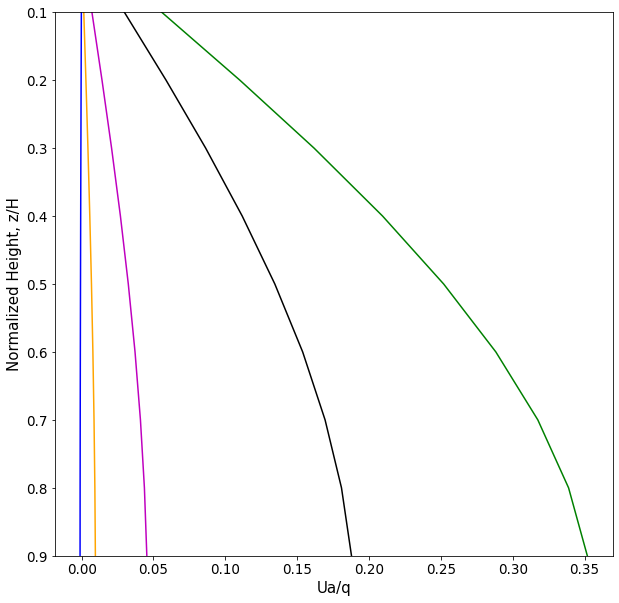

In [35]:
j1 = x_t[:,0]
j2 = x_t[:,1]
j3 = x_t[:,2]
j4 = x_t[:,3]
j5 = x_t[:,4]

plt.figure(figsize=(10,10))

plt.plot(j1, Z, color = "g")
plt.plot(j2, Z, color= "k")
plt.plot(j3, Z, color= "m")
plt.plot(j4, Z, color = "orange")
plt.plot(j5, Z, color = "b")
plt.ylim(0.9,0.1)
plt.xlabel('Ua/q', fontsize=15)
plt.ylabel('Normalized Height, z/H', fontsize=15)
plt.xticks(fontsize=13.5)
plt.yticks(fontsize=13.5)
#plt.savefig(ua/q, dpi = 300)
